In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#<div align="center"><b>Data Cleanup</b></div>

In [7]:
# Create Dataframe
df = pd.read_csv("ABT_Wrangled.csv")

In [ ]:
df.head()

,pid,totalac,dateofsale,yearbuilt,heatedarea,descbuildi,bldggrade,landusecod,descproper,neighbourh,redeveloped,Land_To_Total_Val_Ratio
0,00101101,0.449827,10/30/1970 0:00,NaN,0.0,NaN,NaN,R120,NaN,LAKE NORMAN,0,1.0
1,00101102,0.796589,9/11/2015 0:00,NaN,0.0,NaN,NaN,R100,NaN,LAKE NORMAN,0,1.0
2,00101103,0.779670,6/12/1971 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0
3,00101104,0.756320,2/8/1971 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0
4,00101105,1.213385,10/30/1970 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0


In [ ]:
# Examine DF Charactestics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346496 entries, 0 to 346495
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   pid                      346496 non-null  object 
 1   totalac                  346496 non-null  float64
 2   dateofsale               344248 non-null  object 
 3   yearbuilt                304809 non-null  float64
 4   heatedarea               346496 non-null  float64
 5   descbuildi               304818 non-null  object 
 6   bldggrade                303225 non-null  object 
 7   landusecod               346495 non-null  object 
 8   descproper               304777 non-null  object 
 9   neighbourh               340926 non-null  object 
 10  redeveloped              346496 non-null  int64  
 11  Land_To_Total_Val_Ratio  337011 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 31.7+ MB


In [ ]:
# Missing Value Check
df.isnull().sum()

pid                            0
totalac                        0
dateofsale                  2248
yearbuilt                  41687
heatedarea                     0
descbuildi                 41678
bldggrade                  43271
landusecod                     1
descproper                 41719
neighbourh                  5570
redeveloped                    0
Land_To_Total_Val_Ratio     9485
dtype: int64

In [ ]:
#""" There is overlap between the following variables: Yearbuilt, DescBuilding, DescProper, & BldgGrade; When a property
#has not been developed/built upon it makes sense that none of these columns would have values. However this is still 
#very important, because if an area hasn't been built upon it could be more likley to develop! So we are going to bin the
#years and when all four of these categories have a null value we will replace them with a placeholder value "not built upon"""

# Bin by decades on yearbuilt column
min_year = int(df["yearbuilt"].min())
max_year = int(df["yearbuilt"].max())
bins = list(range((min_year // 10) * 10, (max_year // 10 + 2) * 10, 10))

# Create labels for the bins
labels = [f"{i}-{i + 9}" for i in range((min_year // 10) * 10, (max_year // 10 + 1) * 10, 10)]

# Apply binning to the 'yearbuilt' column
df["yearbuilt_binned"] = pd.cut(df["yearbuilt"], bins=bins, labels=labels, right=False)

# Add "not built upon" to the categories for 'yearbuilt_binned'
df["yearbuilt_binned"] = df["yearbuilt_binned"].cat.add_categories(["not built upon"])

# Function to determine if all specified columns are null for a row
columns_to_check = ["yearbuilt", "descbuildi", "bldggrade", "descproper"]
all_specified_null = df[columns_to_check].isnull().all(axis=1)

# Replace 'yearbuilt_binned' with "not built upon" where all specified columns are null
df.loc[all_specified_null, "yearbuilt_binned"] = "not built upon"

# Replace null values in each of the specified columns with "not built upon"
for column in columns_to_check:
    df.loc[all_specified_null, column] = "not built upon"

# Updated null value check
df.isnull().sum()


pid                           0
totalac                       0
dateofsale                 2248
yearbuilt                     9
heatedarea                    0
descbuildi                    0
bldggrade                  1593
landusecod                    1
descproper                   41
neighbourh                 5570
redeveloped                   0
Land_To_Total_Val_Ratio    9485
yearbuilt_binned              9
dtype: int64

In [ ]:
# Drop rows with nulls
df = df.dropna()

# Check for nulls in the dataframe
df.isnull().sum()

pid                        0
totalac                    0
dateofsale                 0
yearbuilt                  0
heatedarea                 0
descbuildi                 0
bldggrade                  0
landusecod                 0
descproper                 0
neighbourh                 0
redeveloped                0
Land_To_Total_Val_Ratio    0
yearbuilt_binned           0
dtype: int64

In [ ]:
# Calculate days since sale and drop the 'dateofsale' column
df["dayssincesale"] = (pd.Timestamp.now() - pd.to_datetime(df["dateofsale"])).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329035 entries, 0 to 346493
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   pid                      329035 non-null  object  
 1   totalac                  329035 non-null  float64 
 2   dateofsale               329035 non-null  object  
 3   yearbuilt                329035 non-null  object  
 4   heatedarea               329035 non-null  float64 
 5   descbuildi               329035 non-null  object  
 6   bldggrade                329035 non-null  object  
 7   landusecod               329035 non-null  object  
 8   descproper               329035 non-null  object  
 9   neighbourh               329035 non-null  object  
 10  redeveloped              329035 non-null  int64   
 11  Land_To_Total_Val_Ratio  329035 non-null  float64 
 12  yearbuilt_binned         329035 non-null  category
 13  dayssincesale            329035 non-null  in

In [ ]:
# Value count
df['redeveloped'].value_counts()

0    320504
1      8531
Name: redeveloped, dtype: int64

In [ ]:
# w/ domain knowledge we decide to concetenate descprop & descbuildi 
#df['desc_combined'] = df['descproper'] + "_" + df['descbuildi']
#df['desc_combined'].value_counts()

In [ ]:
# w/ domain knowledge we decide to concetenate descprop & descbuildi 
#df['desc_combined1'] = df['descproper'] + "_" + df['descbuildi'] + "_" + df['landusecod']
#df['desc_combined1'].value_counts()
original_df = df.copy()  # Keep a copy of the original DataFrame for final predictions


In [ ]:
# Assuming 'df' is your DataFrame and 'redeveloped' is the column of interest
redeveloped_counts = df['redeveloped'].value_counts()
print(redeveloped_counts)

0    320504
1      8531
Name: redeveloped, dtype: int64


In [ ]:
#<div align="center"><b>Decision Tree Model</b></div>

In [ ]:
from sklearn.utils import resample

zeros = df[df["redeveloped"] == 0]
ones = df[df["redeveloped"] == 1]
print(len(ones))
zeros = resample(zeros, replace=True, n_samples=50000, random_state=42)

df = pd.concat([zeros, ones])

8531


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample


In [ ]:
# Define feature columns
feature_cols = [
    "totalac",
    "yearbuilt_binned",
    "heatedarea",
    "neighbourh",
    "Land_To_Total_Val_Ratio",
    "dayssincesale",
    "landusecod",
    "bldggrade",
]

# Split Dataset into features and target variables
X = df[feature_cols]
y = df.redeveloped

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Upsampling occurrences of 1 in the training set
train = pd.concat([X_train, y_train], axis=1)
train_majority = train[train["redeveloped"] == 0]
train_minority = train[train["redeveloped"] == 1]
train_minority_upsampled = resample(train_minority, replace=True, n_samples=30000)
train_upsampled = pd.concat([train_majority, train_minority_upsampled])
y_train = train_upsampled["redeveloped"]
X_train = train_upsampled.drop("redeveloped", axis=1)

print("Class distribution after upsampling:")
print(train_upsampled['redeveloped'].value_counts())

Class distribution after upsampling:
0    34999
1    30000
Name: redeveloped, dtype: int64


In [ ]:
# Column Transformer/Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            ["totalac", "heatedarea", "Land_To_Total_Val_Ratio", "dayssincesale"],
        ),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            ["neighbourh", "landusecod", "yearbuilt_binned", "bldggrade"],
        ),
    ]
)

In [ ]:
# Create dt pipeline 
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=0))
])

In [ ]:
# Train the model
dt_pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_pipeline.predict(X_test)
y_prob = dt_pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC


[[14589   412]
 [  514  2045]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15001
           1       0.83      0.80      0.82      2559

    accuracy                           0.95     17560
   macro avg       0.90      0.89      0.89     17560
weighted avg       0.95      0.95      0.95     17560

ROC-AUC Score: 0.9700965617532492


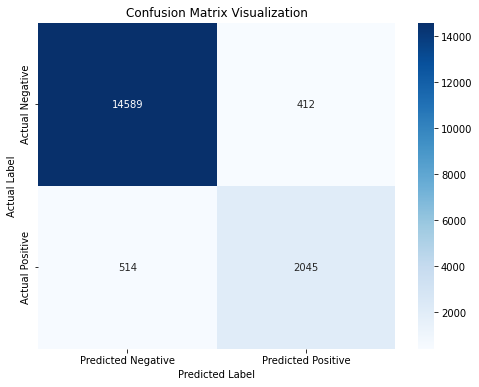

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    "classifier__max_features": ["sqrt","log2",], # Number of features to consider at every split
    #'classifier__max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'classifier__criterion': ['gini', 'entropy'],  #quality of a split
    'classifier__class_weight': ['balanced', None]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    dt_pipeline, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_features': 'log2'}


In [ ]:
# Predict on the testing set using the best found parameters
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# Evaluate the model 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))

[[14420   581]
 [  604  1955]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15001
           1       0.77      0.76      0.77      2559

    accuracy                           0.93     17560
   macro avg       0.87      0.86      0.86     17560
weighted avg       0.93      0.93      0.93     17560

ROC-AUC Score: 0.8626122072518339


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create rf pipeline 
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

In [ ]:
# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_pipeline.predict(X_test)
y_prob = dt_pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))

[[14300   701]
 [  532  2027]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     15001
           1       0.74      0.79      0.77      2559

    accuracy                           0.93     17560
   macro avg       0.85      0.87      0.86     17560
weighted avg       0.93      0.93      0.93     17560

ROC-AUC Score: 0.8726880367673286


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    #"classifier__n_estimators": [100, 200, 300],  # Number of trees in the forest
    "classifier__max_features": ['sqrt', 'log2'],  # Number of features to consider at every split
    #"classifier__max_depth": [4, 6, 8],  # Maximum number of levels in tree
    "classifier__criterion": ['gini', 'entropy']  # Function to measure the quality of a split
}
# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf_pipeline, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2'}


In [ ]:
# Predict on the testing set using the best found parameters
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# Evaluate the model 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))

[[14589   412]
 [  514  2045]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15001
           1       0.83      0.80      0.82      2559

    accuracy                           0.95     17560
   macro avg       0.90      0.89      0.89     17560
weighted avg       0.95      0.95      0.95     17560

ROC-AUC Score: 0.9700965617532492


In [ ]:
# Assuming 'df' is your original DataFrame with all records and columns

# Predict probabilities for the entire dataset using the best model found by GridSearchCV
# Make sure X, derived from df using feature_cols, is properly preprocessed if needed
probabilities_full = grid_search.predict_proba(df[feature_cols])[:, 1]

# Add the predicted probabilities as a new column to the original DataFrame
df['Redevelopment_Probability'] = probabilities_full

# Now, 'df' contains all original data plus a new column with the predicted probabilities
# Optionally, you can save this enriched DataFrame to a CSV file for further analysis or use
df.to_csv("full_dataset_with_probabilities.csv", index=False)

# Display the DataFrame to ensure it looks correct
print(df.head())

             pid   totalac       dateofsale       yearbuilt  heatedarea  \
134180  07511521  0.034901  10/31/2019 0:00          2016.0      2376.0   
160532  10501518  0.216854  12/22/2011 0:00          2010.0      2712.0   
145041  08922214  0.335914   3/31/2005 0:00          1968.0      1222.0   
281166  20942224  0.616650   10/9/2019 0:00          1986.0      4269.0   
131919  07323113  5.064770   9/29/1997 0:00  not built upon         0.0   

            descbuildi       bldggrade landusecod      descproper  \
134180       TOWNHOUSE         AVERAGE       R309  Condo/Townhome   
160532             RES         AVERAGE       R100   Single-Family   
145041             RES         AVERAGE       R100   Single-Family   
281166             RES       VERY GOOD       R100   Single-Family   
131919  not built upon  not built upon       8600  not built upon   

                     neighbourh  redeveloped  Land_To_Total_Val_Ratio  \
134180     BRIGHTWALK TOWNHOMES            0                 

In [ ]:
# Predict probabilities for the original full dataset
y_prob_full = rf_pipeline.predict_proba(original_df[feature_cols])[:, 1]
original_df['Redevelopment_Probability'] = y_prob_full

# Save or display results
original_df.to_csv("full_dataset_with_probabilities.csv", index=False)
print(original_df.head())

        pid   totalac       dateofsale       yearbuilt  heatedarea  \
0  00101101  0.449827  10/30/1970 0:00  not built upon         0.0   
1  00101102  0.796589   9/11/2015 0:00  not built upon         0.0   
2  00101103  0.779670   6/12/1971 0:00  not built upon         0.0   
3  00101104  0.756320    2/8/1971 0:00  not built upon         0.0   
4  00101105  1.213385  10/30/1970 0:00  not built upon         0.0   

       descbuildi       bldggrade landusecod      descproper   neighbourh  \
0  not built upon  not built upon       R120  not built upon  LAKE NORMAN   
1  not built upon  not built upon       R100  not built upon  LAKE NORMAN   
2  not built upon  not built upon       9100  not built upon  LAKE NORMAN   
3  not built upon  not built upon       9100  not built upon  LAKE NORMAN   
4  not built upon  not built upon       9100  not built upon  LAKE NORMAN   

   redeveloped  Land_To_Total_Val_Ratio yearbuilt_binned  dayssincesale  \
0            0                      1.0  

In [ ]:
original_df